In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

### This reaserch is based on the paper, An Explicit Optimal Strategy for Flow Trades at NASDAQ around its Close, published by Christoph Frei and Chad Yan.
<br>
<br>
NASDAQ trading hours and types are as following
<img src="https://i.ibb.co/m0QsRfB/Untitled.png" alt="Untitled" border="0">
<br>
<br>

### Objective:

**A trader wants to place an order with the amount of W before NASDAQ closes, how should the trader split the order volume to gain the highest profit?**
<br>
<br>
A trader wants to place a buy order of $W$ units. They can split the order into $v_1,v_2,...,v_T$ with $\sum_{t=1}^T v_t = W$ where $v_1,v_2,...,v_{T-1}$ are the volumes of orders submitted to the open market and $v_T$ is submitted to the closing auction.
<br>
<br>
For a given initial price $P_0$ , the prices are modelled by 
<br>
$
\begin{equation*}
P_t = P_{t-1} + Z_t +\beta {v_t} \; \; \; \; for \; \;  t∈{1,...,τ−1,τ+1...,T −1} \\
P_τ = P_{τ-1} + Z_t +\alpha {N} +\beta {v_t} \\
P_T = P_{T-1} + Y +\beta {v_t}
\end{equation*}
$
<br>
• $Z_t$ modelling the stock price fluctuations in the open market <br>
• $Y$, modelling the fluctuations from the last price in the open market to the auction price <br>
• $N = N+v_T$ is the auction imbalance <br>
• $α>0$ reflects the impact of the auction imbalance on stock prices <br>
• $β>0$ is the coefficient of temporary market impact by trader's order <br>
• $T$ the closing time of the auction <br>
• Let $τ <T$ be the time of the initial imbalance announcement <br>

-------------------------
The optimal strategy based on modern portfolio theory
is given by

<br>
$
\begin{equation*}
v_1 = \frac{\alpha W}{2(\beta + m_1 + \sum_{i=2}^{τ-1} m_i p_i)} \\
v_t = p_t v_1 \; \; \; \; for \; \;  t= 2, 3,...,τ−1 \\
v_k = 0 \; \; \; \; for \; \;  t= τ,τ+1,...,T-1  \\
v_T = W - (1+\sum_{i=2}^{τ−1} p_i)v_1 \\
where \\
m_t = (T-t)\lambda {\sigma^2}_Z + \lambda {\sigma^2}_Y + \lambda {\alpha}^2 {\sigma^2}_N + \alpha \\
p_t = (\frac{\lambda {\sigma}^2_Z}{\beta} + 1 - x_-)  \frac{{{x^t}_+}}{{x^2}_+-1} + (\frac{\lambda {\sigma}^2_Z}{\beta} + 1 - x_+)  \frac{{{x^t}_-}}{{x^2}_--1} \\
x_{\pm} = 1 + \frac{\lambda {\sigma}^2_Z}{2\beta} \pm \sqrt{\frac{\lambda {\sigma}^2_Z}{\beta}(1+\frac{\lambda {\sigma}^2_Z}{4 \beta})}
\end{equation*}
$
<br>
<br>

---
### Code Breakdown
---
1. Flowchart

2. Research Notes

3. Library and Input

4. Retrieve Data

5. Frei_Chan_Weights

6. Fre-Chan Parameter Sensitivity Analysis

7. Performance Visualization

---
### Analysis:
Based on Frei-Chan strategy, order weights are calculated. In [Frei-Chan Weight Distribution for Last 30 Minutes Figure](#fig1), it can be seen that the last weight takes up most of order volume. In order to analyze the effect of Frei-Chai parameters, this last weight is used as an indicator to demonstrate the importance of 6 main parameters.<br>
As depicted in [Parameter Impact on Frei-Chan Last Weight Figure](#fig2), it can be inferred that $α$, $\lambda$, $\sigma^2_N$ and $\sigma^2_Z$ have the highest impact on volume distribution.<br>
To find optimum parameters, it is assumed that each day, two trades are placed, one using Freo-Chan method and the other using market close time method. The accumulated price difference of these two methods is calculated for selected stocks in 2017 to generate [Frei-Chan Performace Charts](#fig3). Based on this performace charts, follwoing values are selected for parameters:
<br>
$
\begin{equation*}
{\alpha} = 1e-6 \\
{\beta} = 1e-6 \\
{\lambda} = 1e-3 \\
{{\sigma}^2_N} = 1e9 \\
{{\sigma}^2_Z} = 1e-9 \\
{{\sigma}^2_Y} = 1e-9 
\end{equation*}
$
<br>

Using optimal parameters of Frei-Chan strategy, charts for Daily and Cumulative Performance Relative to Stock Close Price (%) have been plotted. It can be seen from [Daily and Cumulative Performace Charts](#fig4) that compared to unbroken order strategy at market close time that the strategy improves the performance.<br>
<br>
As demonstrated in [Performance Table](#fig5), on average 55% of times, Frei-Chan outperforms traditional approach with an average of 0.022% improvement on each trading day.

# 1. Flowchart

<img src="https://i.ibb.co/nkRMvhm/An-Explicit-Optimal-Strategy-for-Flow-Trades-at-NASDAQ-around-its-Close.jpg" alt="Untitled" border="0">


# 2. Research Notes

# 3. Library and Input

In [2]:
import warnings
import matplotlib.cbook
plt.style.use('ggplot')
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

# 4. Retrieve Data

In [3]:
start_date = datetime(2017, 1, 1, 0, 0)
end_date = datetime(2017, 12, 31, 23, 59)
instruments = ["AMZN", "TSLA", "AAPL", "MSFT", "FB", "GOOGL"]

qb = QuantBook()
for instrument in instruments: qb.AddEquity(instrument) # add equity data
history = qb.History(qb.Securities.Keys, start_date, end_date, Resolution.Minute)

In [4]:
df = history[["close"]].reset_index().set_index("time", drop=True)
df["symbol"] = df["symbol"].str.split(expand = True).loc[:,0]
df

,symbol,close
time,,
2017-01-03 09:31:00,MSFT,58.738886
2017-01-03 09:32:00,MSFT,58.617001
2017-01-03 09:33:00,MSFT,58.635753
2017-01-03 09:34:00,MSFT,58.663880
2017-01-03 09:35:00,MSFT,58.682631
...,...,...
2017-12-29 15:56:00,AAPL,40.752145
2017-12-29 15:57:00,AAPL,40.744926
2017-12-29 15:58:00,AAPL,40.740113


# 5. Fre_Chan_Weights

In [5]:
def Frei_Chan_Weights(T = 30, #look back time in minute from 16:00pm NYC
                      W = 100, #number of stocks to buy
                      # Frei-Yan parameters
                      alpha = 5.72e-6,
                      beta = 1e-6, 
                      lamda = 5e-4, 
                      sigma_N = 6.6e8, 
                      sigma_Z = 1.96e-8,
                      sigma_Y = 3.21e-8):
    Tau = T-10 #look back time in minute from 16:00pm NYC market inital imbalance
    # Frei-Yan variables
    m_t = np.arange(T,0,-1)*lamda*sigma_Z+lamda*sigma_Y+lamda*sigma_N*alpha**2+alpha
    x_plus = 1+lamda*sigma_Z/(2*beta)+((lamda*sigma_Z/beta)*(1+(lamda*sigma_Z/(4*beta))))**0.5
    x_minus = 1+lamda*sigma_Z/(2*beta)-((lamda*sigma_Z/beta)*(1+(lamda*sigma_Z/(4*beta))))**0.5
    p_t = (1+lamda*sigma_Z/beta-x_minus)*(x_plus**np.arange(1,T+1))/(x_plus**2-1) + (1+lamda*sigma_Z/beta-x_plus)*(x_minus**np.arange(1,T+1))/(x_minus**2-1)
    # Frei-Yan weights
    v = np.zeros(T)
    # modified section     
    v[0] = round(alpha*W/(2*(beta+m_t[0]+sum(p_t[1:Tau-1]*m_t[1:Tau-1]))),0)
    v[1:Tau-1] = p_t[1:Tau-1]*alpha*W/(2*(beta+m_t[0]+sum(p_t[1:Tau-1]*m_t[1:Tau-1])))
    v[1:Tau-1] = [round(num) for num in v[1:Tau-1]]
    v[T-1] = W-sum(v[0:Tau-1])
    return v


# 6. Fre-Chan Parameter Sensitivity Analysis

<a id="fig1"></a>

Text(0, 0.5, 'Percentage of Order Volume')

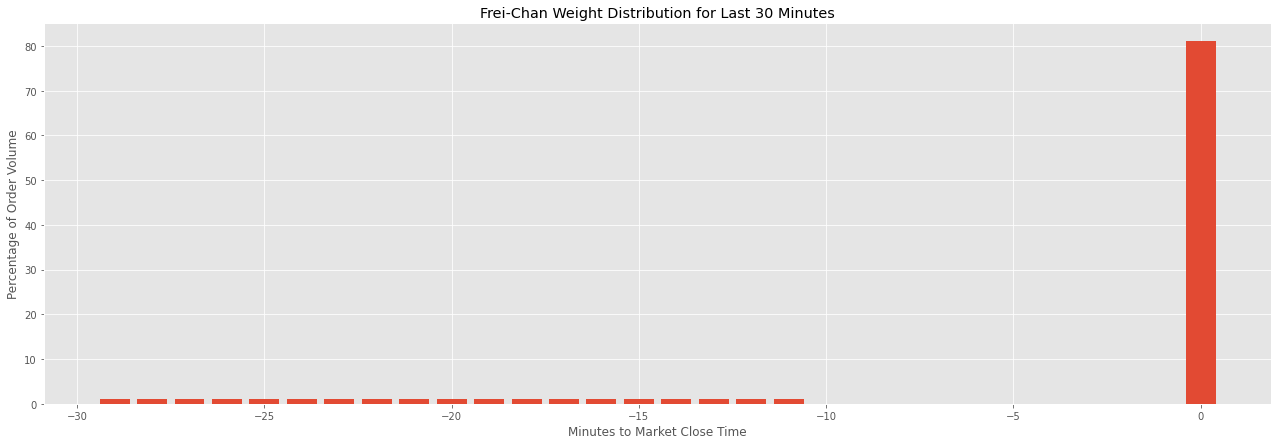

In [6]:
plt.figure(num=None, figsize=(22,7))
plt.bar(range(-(len(Frei_Chan_Weights())-1),1), Frei_Chan_Weights())
plt.title('Frei-Chan Weight Distribution for Last 30 Minutes')
plt.xlabel("Minutes to Market Close Time")
plt.ylabel("Percentage of Order Volume")

<a id="fig2"></a>

Text(0.5, 0.98, 'Parameter Impact on Frei-Chan Last Weight')

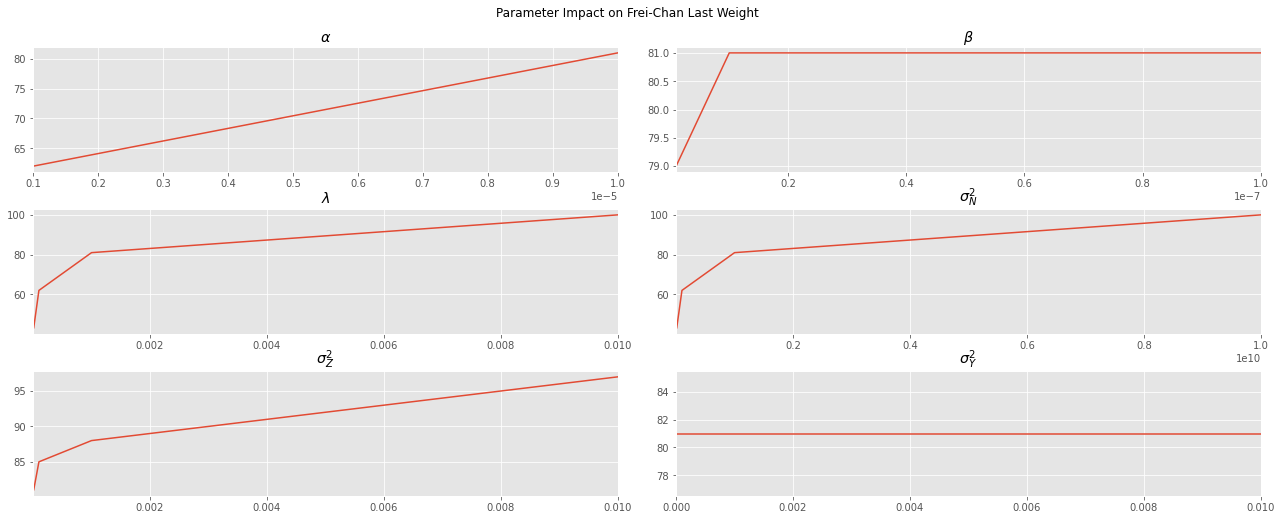

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(22,7))
plt.subplots_adjust(top = 0.9, bottom=0.01, hspace=0.3, wspace=0.1)

pd.DataFrame(data=[Frei_Chan_Weights(alpha=x)[-1] for x in [10**x for x in range(-6,-4)]],
                   index=[10**x for x in range(-6,-4)]
            ).plot(title=r"$\alpha$",
                   ax=axes[0,0], legend=False)

pd.DataFrame(data=[Frei_Chan_Weights(beta=x)[-1] for x in [10**x for x in range(-9,-6)]],
                   index=[10**x for x in range(-9,-6)]
            ).plot(title=r"$\beta$",
                   ax=axes[0,1], legend=False)

pd.DataFrame(data=[Frei_Chan_Weights(lamda=x)[-1] for x in [10**x for x in range(-10,-1)]],
                   index=[10**x for x in range(-10,-1)]
            ).plot(title=r"$\lambda$",
                   ax=axes[1,0], legend=False)

pd.DataFrame(data=[Frei_Chan_Weights(sigma_N=x)[-1] for x in [10**x for x in range(0,11)]],
                   index=[10**x for x in range(0,11)]
            ).plot(title=r"$\sigma^2_N$",
                   ax=axes[1,1], legend=False)

pd.DataFrame(data=[Frei_Chan_Weights(sigma_Z=x)[-1] for x in [10**x for x in range(-10,-1)]],
                   index=[10**x for x in range(-10,-1)]
            ).plot(title=r"$\sigma^2_Z$",
                   ax=axes[2,0], legend=False)

pd.DataFrame(data=[Frei_Chan_Weights(sigma_Y=x)[-1] for x in [10**x for x in range(-15,-1)]],
                   index=[10**x for x in range(-15,-1)]
            ).plot(title=r"$\sigma^2_Y$",
                   ax=axes[2,1], legend=False)

fig.suptitle('Parameter Impact on Frei-Chan Last Weight')

<a id="fig3"></a>

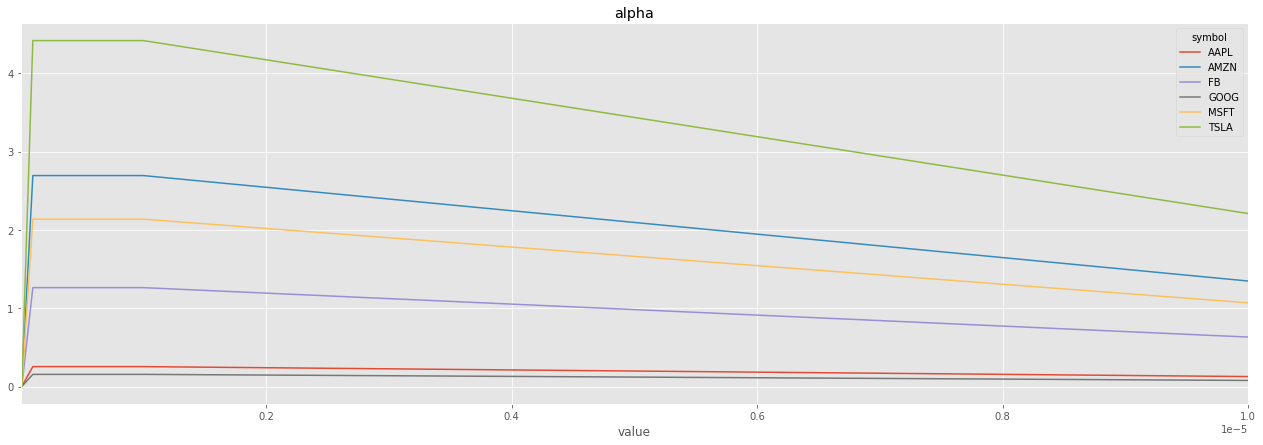

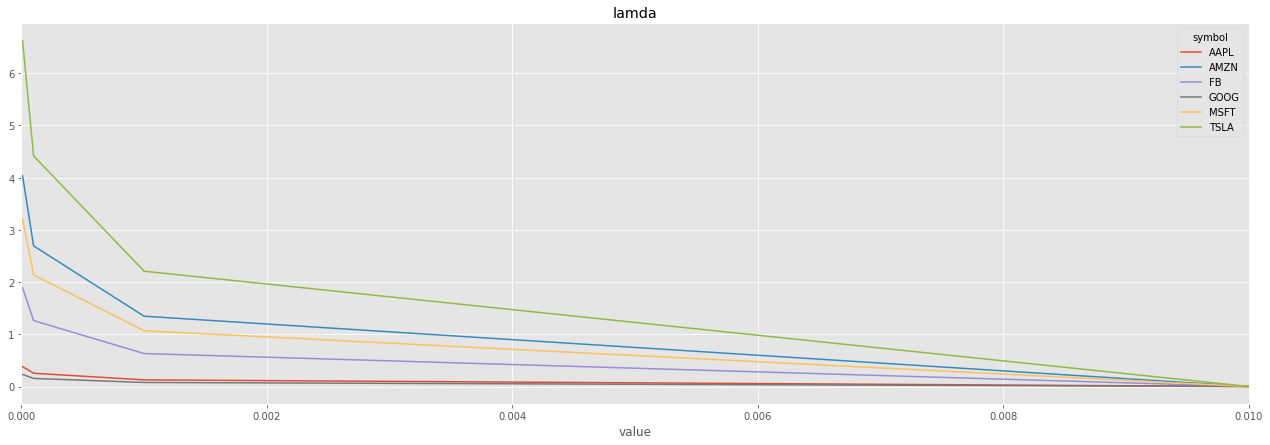

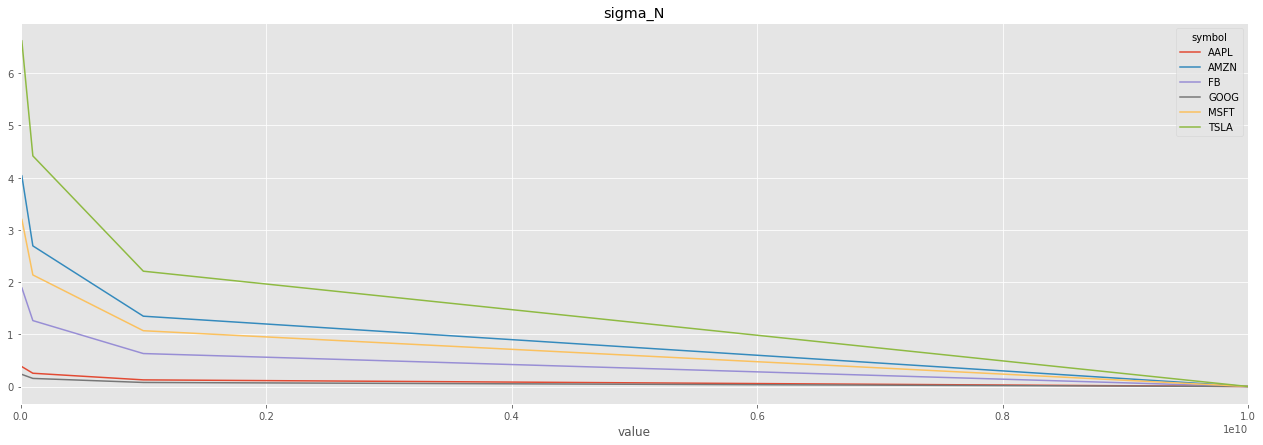

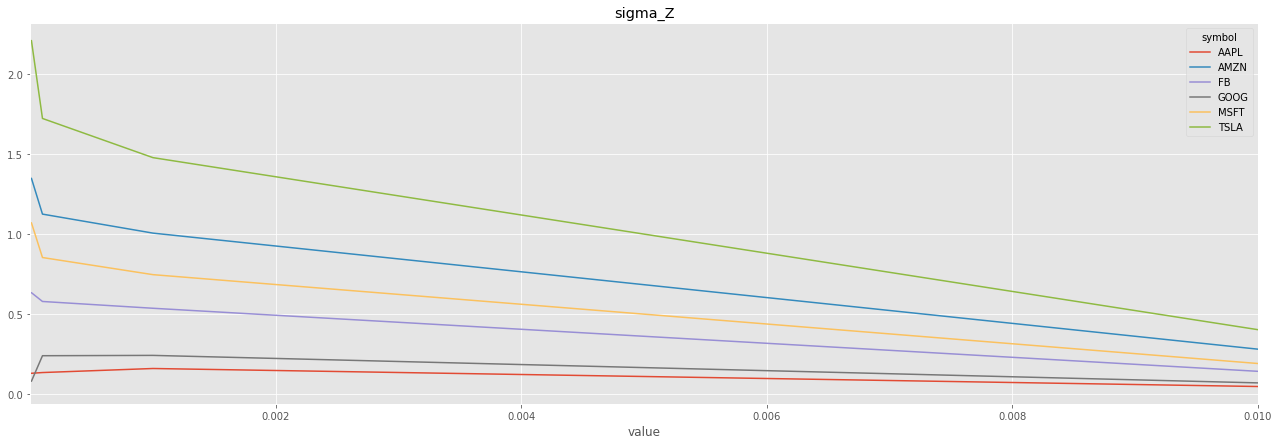

In [8]:
T=30
W = 100
market_close_time = datetime(1974, 1, 1, 16, 0)
market_before_close_time = datetime(1974, 1, 1, 16, 0)-timedelta(minutes=T-1)
df0 = df.between_time(market_before_close_time.time(), market_close_time.time())

def Frei_Chan_Parameters(x, param):
    ser = x.to_numpy().ravel()
    tuples = []
    values = []
    W = param["W"]
    for k,vs in param.items():
        if type(vs) is list:
            for v in vs:
                values.append(sum([100*(ser[-1]-sum(ser*Frei_Chan_Weights(**{k:v}))/W)/ser[-1]]))
                tuples.append((k,v))
    index = pd.MultiIndex.from_tuples(tuples, names=["parameter", "value"])
    return pd.Series(values, index=index)

param = dict(alpha = [10**x for x in range(-10,-4)],
             lamda = [10**x for x in range(-20,-1)],
             sigma_N = [10**x for x in range(-10,11)],
             sigma_Z = [10**x for x in range(-10,-1)],
             W=W)

df1 = df0.groupby([df0.index.date, "symbol"])[["close"]].apply(Frei_Chan_Parameters, param=param).groupby(["symbol"]).sum().T

for title, group in df1.reset_index().set_index("value").groupby("parameter"): group.plot(title=title, figsize=(22,7))

# 7. Performance Visualization

<a id="fig4"></a>

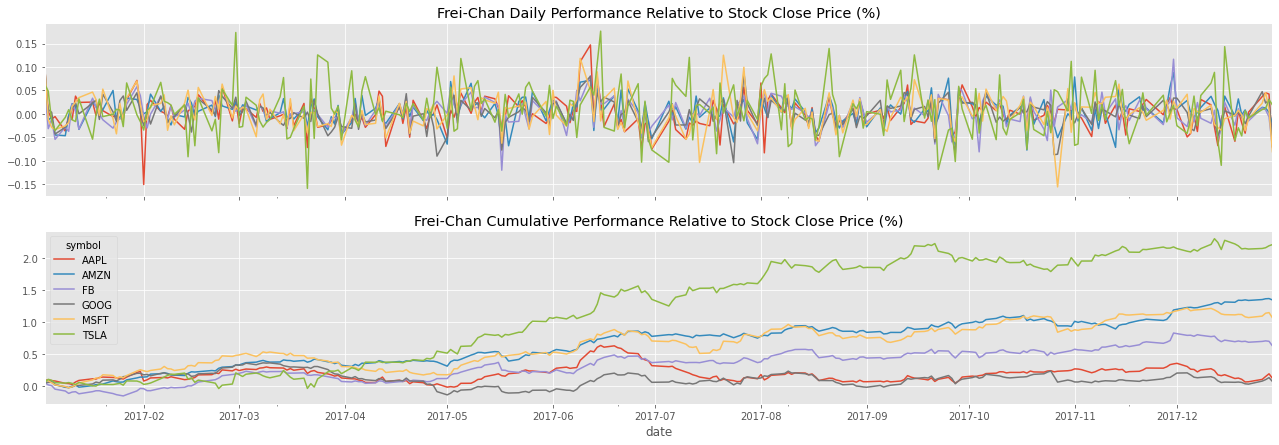

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(22,12), sharex= True)

v = Frei_Chan_Weights(T = T,
                      W = W,
                      alpha = 1e-6,
                      beta = 1e-6, 
                      lamda = 1e-3, 
                      sigma_N = 1e9, 
                      sigma_Z = 1e-9 ,
                      sigma_Y = 1e-9 )

df2 = df0.groupby([df0.index.date, "symbol"])["close"].agg([lambda x:100*(x[-1]-sum(x*v)/W)/x[-1]]).rename(columns={"<lambda>":"% Frei-Chan"})
df2 = df2.unstack(level=-1)
df2.columns.rename("change", level=0, inplace=True)
df2.columns = df2.columns.droplevel()
df2.index.name = "date"

df2.plot(figsize=(22,7), ax=axes[0], title="Frei-Chan Daily Performance Relative to Stock Close Price (%)", legend=False)
df2.cumsum().plot(figsize=(22,7), ax=axes[1],  title="Frei-Chan Cumulative Performance Relative to Stock Close Price (%)")


<a id="fig5"></a>

symbol,AAPL,AMZN,FB,GOOG,MSFT,TSLA
positive relative returns(%),51.400,57.800,56.600,52.600,55.000,55.000
negative relative returns(%),48.600,42.200,43.800,47.400,45.000,45.000
positive relative returns mean,0.024,0.024,0.022,0.021,0.029,0.045
negative relative returns mean,-0.025,-0.020,-0.023,-0.023,-0.026,-0.036


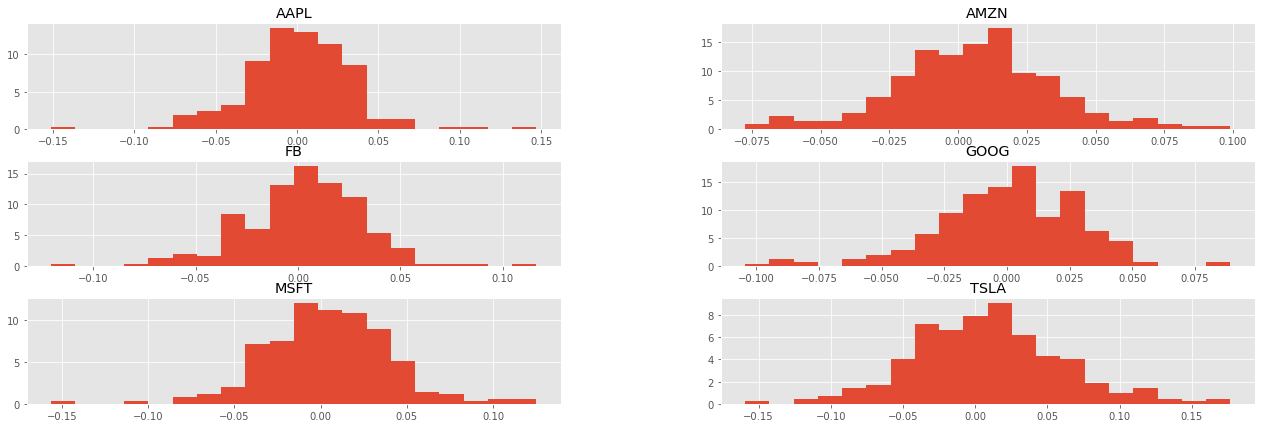

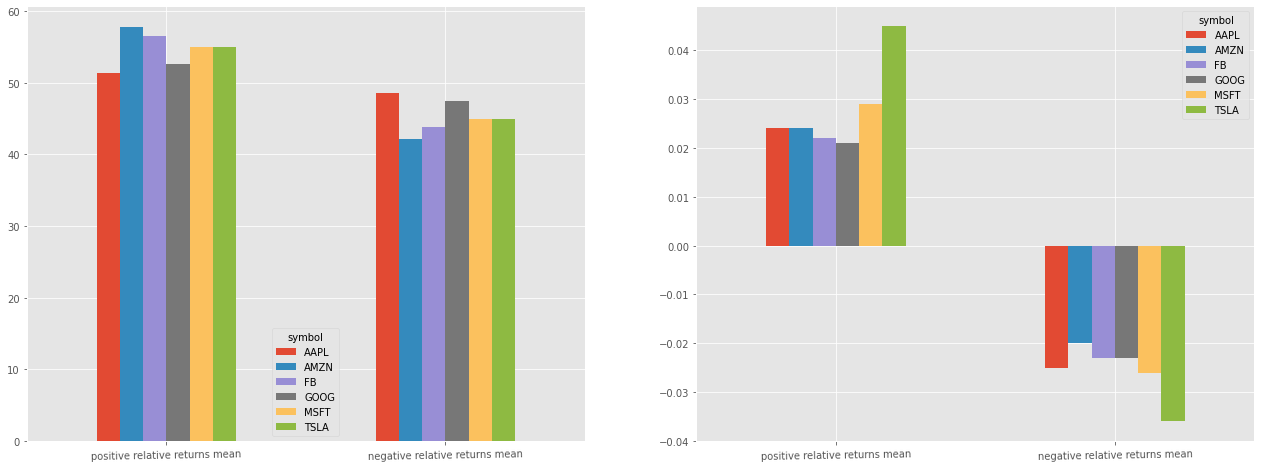

In [10]:
df2.hist(bins=20, figsize=(22,7), density=True)
def Performance_Info(x):
    return pd.Series({
        "positive relative returns(%)":round(100*x.ge(0).sum()/len(x),1),
        "negative relative returns(%)":round(100*x.le(0).sum()/len(x),1),
        "positive relative returns mean":round(x[x.ge(0)].mean(),3),
        "negative relative returns mean":round(x[x.le(0)].mean(),3),
    })
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22,8), sharex= True)

df2.apply(Performance_Info).drop(index=["positive relative returns mean", "negative relative returns mean"]).plot(kind="bar", ax=axes[0], rot=1)
df2.apply(Performance_Info).drop(index=["positive relative returns(%)", "negative relative returns(%)"]).plot(kind="bar", ax=axes[1], rot=1)

df2.apply(Performance_Info)